<a href="#oND0yYSx9Bdt" target="_self"><button>Ir para Aula 8</button></a>

# Aula 07: Análise Exploratória para Modelagem    

*   **Professor:** Paulo Rogério Pires Manseira
*   **Alunos:** Maruan Biasi El Achkar e Ricardo Falcão Schilieper
*   **GitHub:** github.com/manseiracredit

---

# Importar Dataset - Telco Customer Churn
**Fonte:** https://www.kaggle.com/datasets/blastchar/telco-customer-churn


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Path to dataset files: /kaggle/input/telco-customer-churn


# Criar Dataframe

In [2]:
import os
import pandas as pd

path_csv = os.path.join(path, 'WA_Fn-UseC_-Telco-Customer-Churn.csv')

df = pd.read_csv(path_csv)

display(df.head(3))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


#  Carregamento e Diagnóstico

In [3]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

In [4]:
display(df.describe())

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
display(df.isnull().sum())

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


# Análise da Variável-Alvo ( Churn )

In [6]:
import seaborn as sns

<Axes: xlabel='Churn', ylabel='count'>

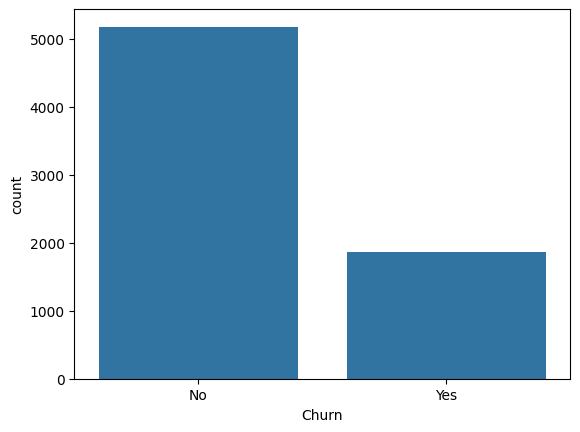

In [7]:
sns.countplot(data=df, x='Churn')

In [8]:
churn_counts = df['Churn'].value_counts()
total_customers = churn_counts.sum()

churn_yes_percentage = (churn_counts['Yes'] / total_customers) * 100
churn_no_percentage = (churn_counts['No'] / total_customers) * 100

print(f"Porcentagem de Churn): {churn_yes_percentage:.2f}%")
print(f"Porcentagem de NÃO Churn: {churn_no_percentage:.2f}%")

Porcentagem de Churn): 26.54%
Porcentagem de NÃO Churn: 73.46%


## Interpretação do gráfico acima

O gráfico acima nos mostra que a quantidade de clientes fiéis é mais que o dobro da quantidade de clientes que deram churn.

---

### Pergunta para Reflexão:
- As classes estão balanceadas? Se um grupo é muito menor que o outro, que desafios isso pode trazer para o nosso modelo?

**Resp.:** Não estão balanceadas, o gráfico nos indica que a quantidade de negativos na métrica alvo "Churn" é mais que o dobro da quantidade de positivos.
Isso pode desencadear em um algorítimo de predição que é melhor em prever negativos do que positivos, o que também acarreta em uma  quantidade significante de falsos negativos.

---

# Relação entre Variáveis Categóricas e o Churn

<Axes: xlabel='Contract', ylabel='count'>

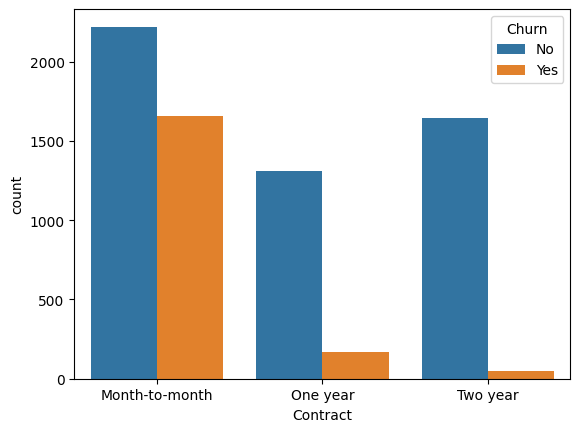

In [9]:
sns.countplot(x='Contract', hue='Churn', data=df)

## Interpretação do gráfico acima

O gráfico acima nos mostra uma correlação extremamente clara entre tempo de contrato e churning. Quanto mais curto o contrato, maior a chance de churning.

---

<Axes: xlabel='InternetService', ylabel='count'>

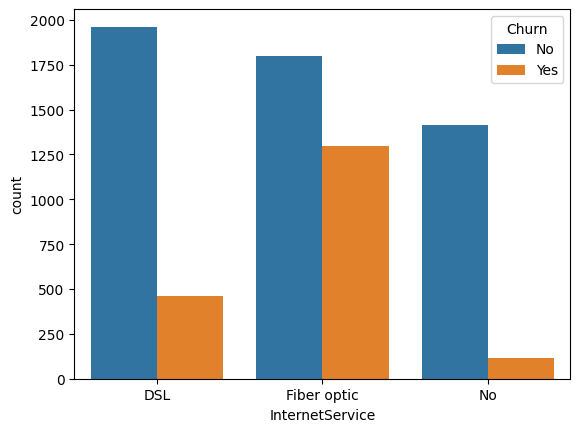

In [10]:
sns.countplot(x='InternetService', hue='Churn', data=df)

## Interpretação do gráfico acima

O gráfico nos motra que a grande maioria do churning acontece a partir de pessoas que utilizam internet via Fibra Ótica.
---

<Axes: xlabel='Partner', ylabel='count'>

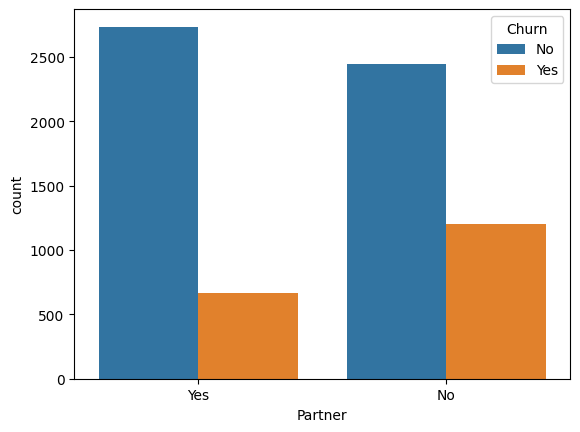

In [11]:
sns.countplot(x='Partner', hue='Churn', data=df)

## Interpretação do gráfico acima

O gráfico acima nos mostra uma correlação fraca mas existente, onde clientes não parceiros tem uma tendencia um pouco maior a dar churning.

---

### Pergunta para Reflexão
- Em qual categoria de contrato (mensal, um ano, dois anos) a barra de 'Churn: Yes' é proporcionalmente maior? O que isso nos diz sobre o comportamento do cliente?

**Resp.:** Na categoria mensal (Month-to-month). Isso nos diz que, clientes assinantes do plano mensal são mais propícios a cancelarem o plano. Acreditamos que essa estatíscias esteja "invertida", nossa interpretação é que, clientes que pretendem cancelar, optam pelo plano mensal para gastarem o mínimo possível.

---

# Relação entre Variáveis Numéricas e o Churn

<Axes: xlabel='Churn', ylabel='tenure'>

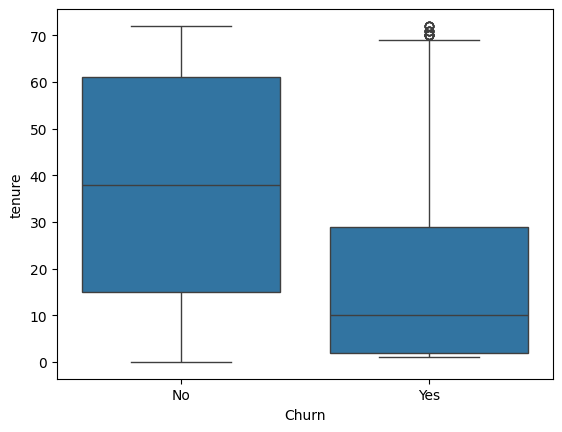

In [12]:
sns.boxplot(x='Churn', y='tenure', data=df)

## Interpretação do gráfico acima

O gráfico acima nos mostra que clientes mais longos, ou seja, clientes que são assinantes a mais tempo, tem uma chance bem menor de dar churn.

---

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

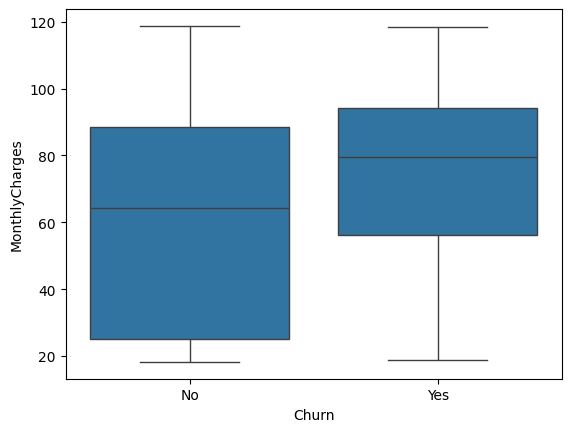

In [13]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)

## Interpretação do gráfico acima

O gráfico acima nos mostra a mesma coisa que um dos gráficos anteriores, que clientes com planos de pagamento mensal tem maior tendencia a se tornarem clientes churn.

---

# Gráficos Extras

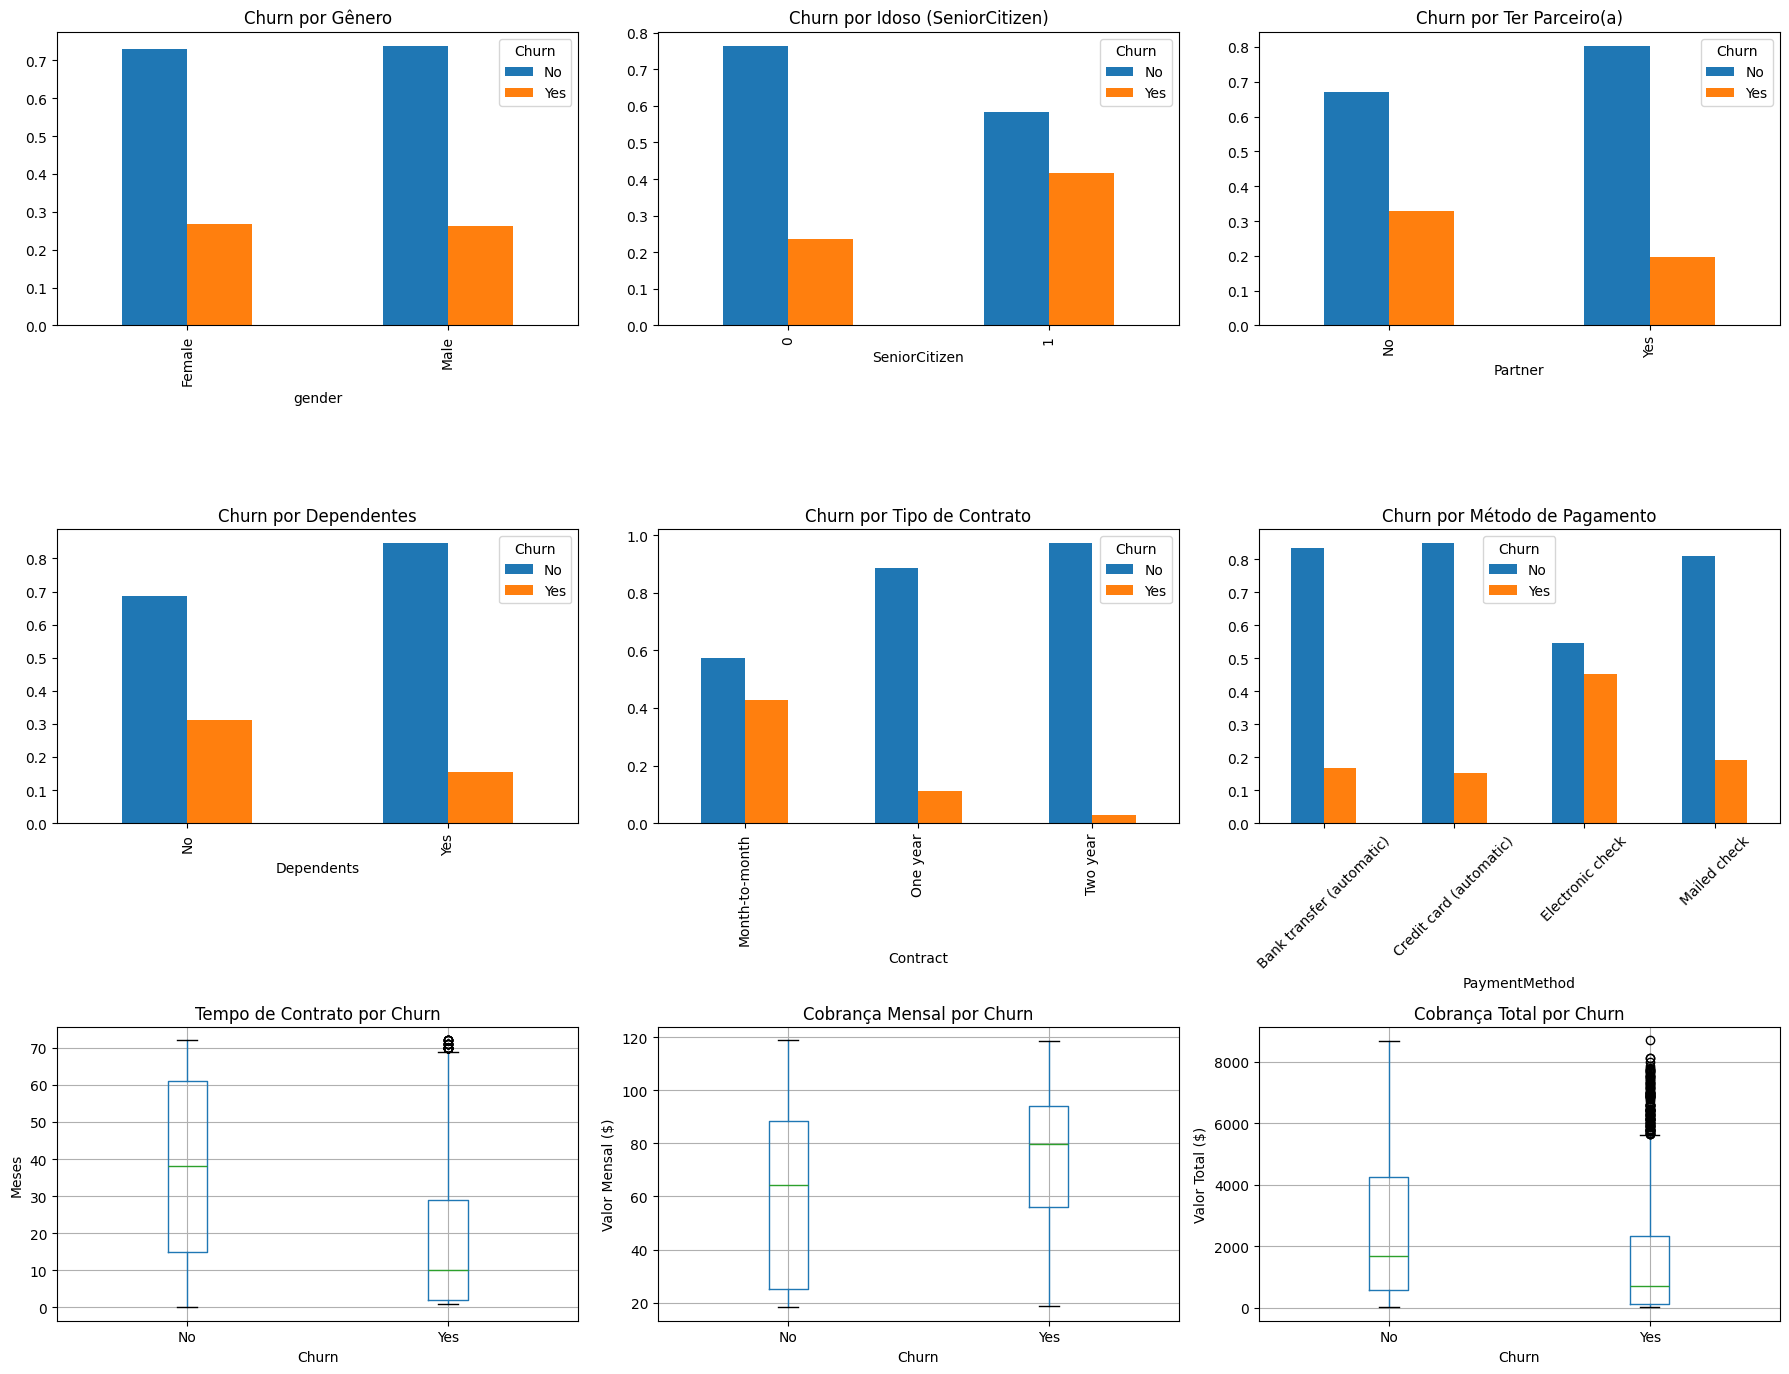

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.flatten()

df.groupby("gender")["Churn"].value_counts(normalize=True).unstack().plot(kind="bar", ax=axes[0])
axes[0].set_title("Churn por Gênero")

df.groupby("SeniorCitizen")["Churn"].value_counts(normalize=True).unstack().plot(kind="bar", ax=axes[1])
axes[1].set_title("Churn por Idoso (SeniorCitizen)")

df.groupby("Partner")["Churn"].value_counts(normalize=True).unstack().plot(kind="bar", ax=axes[2])
axes[2].set_title("Churn por Ter Parceiro(a)")

df.groupby("Dependents")["Churn"].value_counts(normalize=True).unstack().plot(kind="bar", ax=axes[3])
axes[3].set_title("Churn por Dependentes")

df.groupby("Contract")["Churn"].value_counts(normalize=True).unstack().plot(kind="bar", ax=axes[4])
axes[4].set_title("Churn por Tipo de Contrato")

df.groupby("PaymentMethod")["Churn"].value_counts(normalize=True).unstack().plot(kind="bar", ax=axes[5])
axes[5].set_title("Churn por Método de Pagamento")
axes[5].tick_params(axis="x", rotation=45)

df.boxplot(column="tenure", by="Churn", ax=axes[6])
axes[6].set_title("Tempo de Contrato por Churn")
axes[6].set_ylabel("Meses")
axes[6].get_figure().suptitle("")

df.boxplot(column="MonthlyCharges", by="Churn", ax=axes[7])
axes[7].set_title("Cobrança Mensal por Churn")
axes[7].set_ylabel("Valor Mensal ($)")
axes[7].get_figure().suptitle("")

df.boxplot(column="TotalCharges", by="Churn", ax=axes[8])
axes[8].set_title("Cobrança Total por Churn")
axes[8].set_ylabel("Valor Total ($)")
axes[8].get_figure().suptitle("")

plt.tight_layout()
plt.show()

## Interpretação do gráfico acima

O gráfico acima é uma junção de gráficos para todas as nossas variáveis. Ele nos traz várias informações interessantes que serão usadas na nossa conclusão.

---

# Heatmap Extra

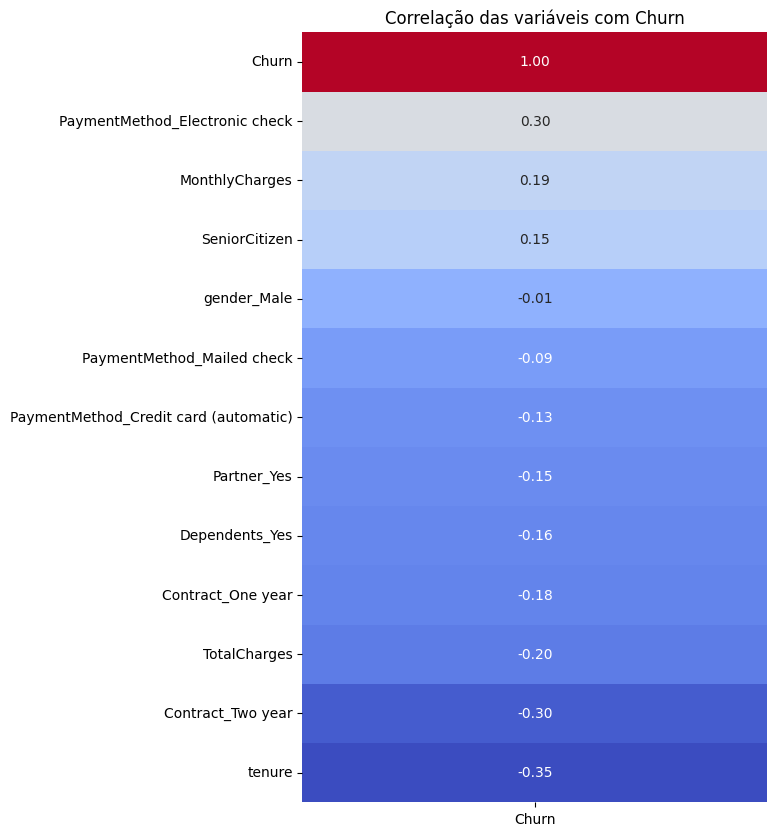

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df2 = df.copy()

df2["Churn_num"] = df2["Churn"].map({"No": 0, "Yes": 1})

cols_insights = [
    "gender", "SeniorCitizen", "Partner", "Dependents",
    "Contract", "PaymentMethod", "tenure", "MonthlyCharges", "TotalCharges"
]

df_dummies = pd.get_dummies(df2[cols_insights], drop_first=True)

df_dummies["Churn"] = df2["Churn_num"]

corr = df_dummies.corr()

churn_corr = corr[["Churn"]].sort_values(by="Churn", ascending=False)

plt.figure(figsize=(6,10))
sns.heatmap(churn_corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=False)
plt.title("Correlação das variáveis com Churn")
plt.show()


## Interpretação do gráfico acima

O gráfico acima nos traz o índice de correlação todas as nossas variáveis com a variável alvo churn. Ele nos traz várias informações interessantes que serão usadas na nossa conclusão.

---

### Pergunta para Reflexão

- Clientes que cancelam ( Churn: Yes ) tendem a ter um tempo de contrato ( tenure ) maior ou menor? E suas cobranças mensais, são mais altas ou mais baixas? O que as medianas nos boxplots revelam?

**Resp.:** Clientes que cancelam tendem a ter um tempo de contrato menor e também tendem a ter cobranças mensais mais altas. As medianas revelam essas duas tendências mencionadas.

---

# Conclusão

- Com base nesta análise, quais são as 3 a 5 variáveis mais promissoras que você escolheria para treinar um modelo? Justifique sua escolha com base nos gráficos

**Resp.:**
- PaymentMethod_EletronicCheck: O heatmap nos mostra que essa variável, que indica pagamentos automáticos, tem uma forte correlação positiva com Churn.
- MonthlyCharges: Como já respondido antes, os gráficos nos mostraram uma relação extramente forte entre pagamentos mensais e churn.
- SeniorCitizen: O heatmap nos mostra uma correlação fraca porém positiva entre a idade do cliente e o Churn.
- Contract_TwoYear: O contrário do MonthlyCharge, contratos longos, como os de dois anos indicados por essa variável, tendem a trazer clientes mais fiéis.
- Tenure: Essa é uma das variáveis mais importantes para a nossa análise, pois traz uma correlação extremamente clara, ela nos diz que, quanto maior o prazo que um cliente é assinante, menor a chance dele deixar de ser.

---
---
---

# Aula 08: Modelagem para Classificação

*   **Professor:** Paulo Rogério Pires Manseira
*   **Alunos:** Maruan Biasi El Achkar e Ricardo Falcão Schilieper
*   **GitHub:** github.com/manseiracredit

---

# Importar Dataset - Telco Customer Churn
**Fonte:** https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [16]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Path to dataset files: /kaggle/input/telco-customer-churn


# Criar Dataframe

In [17]:
import os
import pandas as pd

path_csv = os.path.join(path, 'WA_Fn-UseC_-Telco-Customer-Churn.csv')

df = pd.read_csv(path_csv)

display(df.head(3))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


# Parte 1: Preparação dos Dados para Modelagem

In [18]:
## 1.1 Seleção de Features (Variáveis Independentes) e Target (Variável-Alvo)

* Com base na sua conclusão do Aula 07, crie uma lista com os nomes das colunas que você considera mais importantes:

### Lista de variáveis promissoras a partir da análise gráfica no EDA:

* tenure
* Contract
* SeniorCitizen
* MonthlyCharges
* PaymentMethod
* TotalCharges
* Partner
* Dependents

In [19]:
features = ["tenure", "Contract", "SeniorCitizen", "MonthlyCharges", "PaymentMethod", "TotalCharges", "Partner", "Dependents"]
target = "Churn"

x = df[features]
y = df[target]

display(x.head(3))
display(y.head(3))

,tenure,Contract,SeniorCitizen,MonthlyCharges,PaymentMethod,TotalCharges,Partner,Dependents
0,1,Month-to-month,0,29.85,Electronic check,29.85,Yes,No
1,34,One year,0,56.95,Mailed check,1889.5,No,No
2,2,Month-to-month,0,53.85,Mailed check,108.15,No,No


,Churn
0,No
1,No
2,Yes


## 1.2 Codificação de Variáveis Categóricas (One-Hot Encoding)

In [20]:
x_encoded = pd.get_dummies(x, drop_first=True)


display(x_encoded.head(3))
display(y.head(3))

print("Shape original de X:")
display(x.shape)
print("--------------")
print("Shape tratato de X:")
display(x_encoded.shape)

x = x_encoded

,tenure,SeniorCitizen,MonthlyCharges,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TotalCharges_100.2,TotalCharges_100.25,...,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Partner_Yes,Dependents_Yes
0,1,0,29.85,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,34,0,56.95,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,0,53.85,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


,Churn
0,No
1,No
2,Yes


Shape original de X:


(7043, 8)

--------------
Shape tratato de X:


(7043, 6540)

## Pontos de Parada para Discussão em Dupla (Reflexão):

1. "Por que não incluímos todas as colunas do dataset como features? Qual é a
desvantagem de usar variáveis que a nossa EDA mostrou não ter relação com o Churn?"                    
**Resp.:** Pois as colunas que não tem relação com nossa variável alvo só servem para criar *noise/ruído* nos modelos de predição, além disso, deixa o treinamento muito mais demorado.

2. "Ao usar  pd.get_dummies() , uma coluna como  Contract  (com 3 categorias) se
transforma em 2 ou 3 novas colunas. Por que isso acontece? O que os valores 0 e 1 nessas novas colunas representam?"                
**Resp.:** Pois a coluna Contract possui 3 tipos diferentes de valores, ou seja, na hora de transformar isso em um boolean, que aceita apenas dois valores (sim ou não) é necessário separar os três valores em três colunas diferentes, para que o boolean consiga representar todos eles. Ou seja, em vez de uma coluna dizendo qual o tipo de contrato, temos três colunas, cada uma dizendo que o tipo de contrato é ou não é aquele.

-----------

# Parte 2: Treino e Teste - A Regra de Ouro do Machine Learning

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
      x,
      y,
      test_size=0.3,
      random_state=42,
      stratify=y
  )

In [22]:
print(f"Tamanho do conjunto de treino (X_train): {x_train.shape[0]} clientes")
print(f"Tamanho do conjunto de teste (X_test): {x_test.shape[0]} clientes")

Tamanho do conjunto de treino (X_train): 4930 clientes
Tamanho do conjunto de teste (X_test): 2113 clientes


In [23]:
print("\nProporção de Churn no y_train:")
print(y_train.value_counts(normalize=True))
print("\nProporção de Churn no y_test:")
print(y_test.value_counts(normalize=True))


Proporção de Churn no y_train:
Churn
No     0.734686
Yes    0.265314
Name: proportion, dtype: float64

Proporção de Churn no y_test:
Churn
No     0.734501
Yes    0.265499
Name: proportion, dtype: float64


# Parte 3: Construindo e Avaliando o Modelo de Classificação

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

decisiontree = DecisionTreeClassifier(
    max_depth = 6,
    random_state = 42
    )

In [25]:
decisiontree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [26]:
previsoes = decisiontree.predict(x_test)

In [27]:
accuracy = accuracy_score(y_test, previsoes)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 77.61%


## Pontos de Parada para Discussão em Dupla (Reflexão):

1. Nossa acurácia foi de  77.61% . Isso é um bom resultado? Comparem com a proporção de "Não Churn" que vocês viram na EDA. Nosso modelo é mais inteligente do que simplesmente chutar "Não Churn" para todos os clientes?

**Resp.:** Sim, é um bom resultado. A porcentagem de clientes que não deram churn, de acordo com o EDA, é de 73.46%, isso significa que nosso modelo foi mais eficaz do que simplesmente chutar.

2. O que significa  max_depth=4 ? Se aumentarmos para  max_depth=10 , a acurácia nos dados de teste necessariamente aumentaria? Qual o risco de criar uma árvore muito complexa?

**Resp.:** Significa a quantidade de "camadas" que nossa árvore vai ter, ou como o nome sugere, sua profundidade. No nosso caso, testamos com alguns valores diferentes e encontramos a maior acurácia (77.61%) utilizando um *max_depth=6*. Não, se mudarmos para 10, não necessariamente aumentaria, na verdade, de acordo com nossos testes, a acurácia diminui com um max_depth de 10, isso, por causa do overfitting, que é um modelo especialista demais nos dados utilizados no treinamento, é como se o modelo tivesse decorado os dados que já viu, se tornando ruim na hora de analizar novos dados.

# Conclusão Final

Concluimos que o modelo criado é útil para nosso negócio, mas acreditamos que uma acurácia melhor pode ser obtiva através de outros modelos, até mesmo versões mais otimizadas do modelo de árvore como RandomForest, CatBoost, XGBoost e LightGBM.

# Teste com o modelo CatBoost

In [28]:
!pip install catboost
import catboost as cb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.8 MB/s eta 0:00:00


In [29]:
catboost = cb.CatBoostClassifier(
    random_state=42,
    verbose=0
)

catboost.fit(x_train, y_train)

catboost_previsoes = catboost.predict(x_test)

catboost_accuracy = accuracy_score(y_test, catboost_previsoes)
print(f"Accuracy do CatBoost: {catboost_accuracy:.2%}")

Accuracy do CatBoost: 79.79%


# Conclusão CatBoost

Nossa hipótese de que o CatBosst poderia trazer uma acurácia melhor estava correta. Conseguimos um aumento de 2,18 pontos percentuais comparado ao modelo tradicional de árvore. Acreditamos que essa acurácia pode ser melhorada mais ainda utilizando modelos mais compatíveis com o nosso cenário e também através de otimização de parametros.